# Facial emotion recognition
The aim of this lab (TP) is to is to recognize facial emotions from a video using deep learning
approach. The system can take pictures or video form webcam as input. It detects all faces in
each frame, and then classifies the emotions as belonging to one of the 7 emotion categories:
Angry, Disgusted, Neutral, Sad, Happy, Surprised and Fear.
Facial landmarks are used to localize and represent salient regions of the face, such as: eyes,
eyebrows nose, mouth jawline. They have been successfully applied to face alignment, head
pose estimation, face swapping, blink detection and much more.

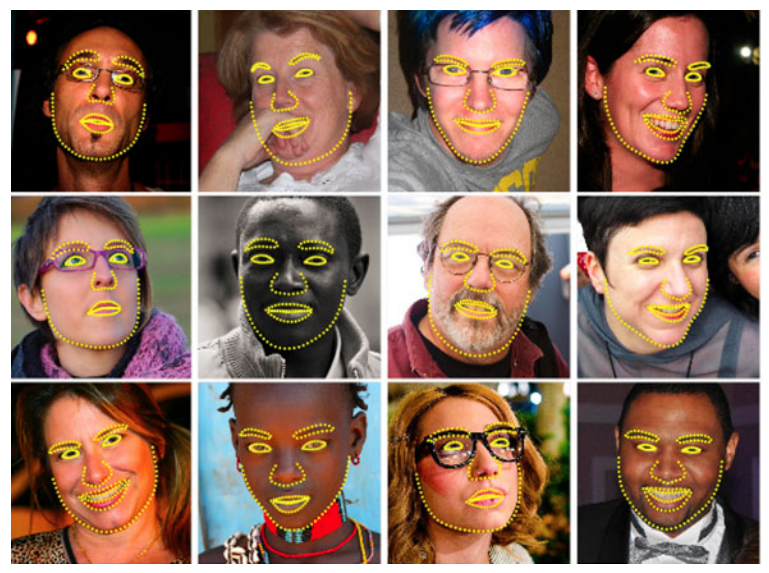

We propose here to develop an approach based on famous facial landmarks (68 facial landmarks can be detected with dlib library), which and use the Eucledian distance between them as 68x68 array and use them as feature to learn a network

In [1]:
import zipfile
with zipfile.ZipFile("Ressources.zip", 'r') as zip_ref:
    zip_ref.extractall("Ressources")

In [ ]:
def euclidean(a, b):
    dist = math.sqrt(math.pow((b[0] - a[0]), 2) + math.pow((b[1] - a[1]), 2))
    return dist 

def euclidean_all(a):  # calculates distances between all 68 elements
	distances = ""
	for i in range(0, len(a)):
		for j in range(0, len(a)):
			dist = euclidean(a[i], a[j])
			dist = "%.2f" % dist;
			distances = distances + " " + str(dist)
	return distances

Propose a neuron network composed only of a few layers of full connected layers like this architecture:
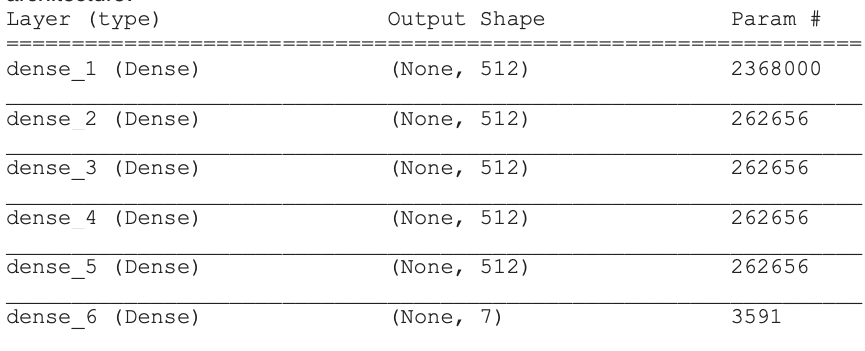

In [ ]:
from tensorflow import keras
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(4624,), activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(7, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2368000   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 7)                 3

To train this network, you can use the dataset (train_test_landmarks.zip extracted from a
mixture of CK+ and JAFFE datasets) already prepared as feature vector of distances with the
format:(741, 4624) for train and (365, 4624) for test. After the training, save you best model.
https://drive.google.com/file/d/1teun1oa2nolShwfpksV-nOdeWCX484ax/view?usp=sharing


To prepare your files for training and 

In [ ]:
import zipfile
with zipfile.ZipFile("Ressources/Ressources/train_test_landmarks.zip", 'r') as zip_ref:
    zip_ref.extractall("train_test_landmarks")

In [ ]:
import numpy as np
X_train = np.load('train_test_landmarks/x_train.npy')
X_test = np.load('train_test_landmarks/x_test.npy')
y_train = np.load('train_test_landmarks/y_train.npy')
y_test = np.load('train_test_landmarks/y_test.npy')

In [ ]:
model.compile(keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["acc"])
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=[X_test, y_test])

Epoch 1/50
12/12 [==============================] - 1s 24ms/step - loss: 1.8839 - acc: 0.4669 - val_loss: 1.4428 - val_acc: 0.5836
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 1.4516 - acc: 0.5843 - val_loss: 1.0846 - val_acc: 0.6712
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 1.1311 - acc: 0.6599 - val_loss: 0.9626 - val_acc: 0.7178
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9722 - acc: 0.7085 - val_loss: 0.8615 - val_acc: 0.7589
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.8426 - acc: 0.7233 - val_loss: 0.9503 - val_acc: 0.6932
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 0.8513 - acc: 0.7260 - val_loss: 0.8106 - val_acc: 0.7123
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.7811 - acc: 0.7463 - val_loss: 0.6342 - val_acc: 0.8000
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.7044 - acc: 0.

Now, in order to use the vector of these distances to classify emotions from 
an image, you detect the face region, extract the facial landmarks and then compute the 4624 distances between them.

The following script allow to capture the face region using Haar detector
(haarcascade_frontalface_default.xml) and detect 68 facial landmarks using the learned model (shape_predictor_68_face_landmarks.dat):

In [ ]:
model.save("landmarks_model.h5")

In [ ]:
import numpy as np
import cv2
from imutils import face_utils
import imutils
import dlib
# -----------

face_cascade = cv2.CascadeClassifier('Ressources/Ressources/haarcascade_frontalface_default.xml')
# initialize dlib's face detector and create a predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("Ressources/Ressources/shape_predictor_68_face_landmarks.dat")

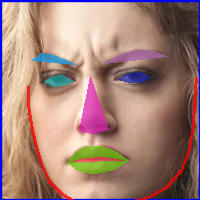

1/1 [==============================] - 0s 85ms/step
[[0. 1. 0. 0. 0. 0. 0.]]


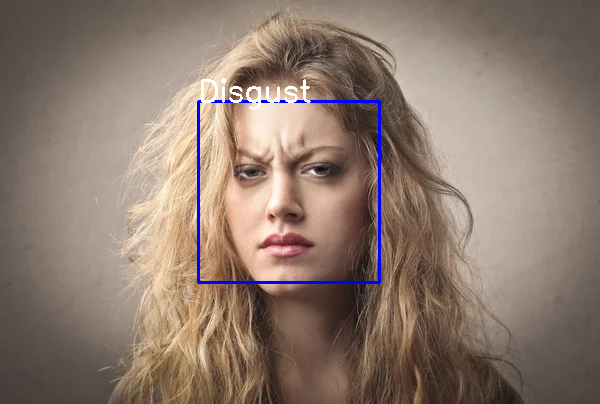

-1

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
def euclidean(a, b):
    dist = math.sqrt(math.pow((b[0] - a[0]), 2) + math.pow((b[1] - a[1]), 2))
    return dist 

def euclidean_all(a):  # calculates distances between all 68 elements
	distances = ""
	for i in range(0, len(a)):
		for j in range(0, len(a)):
			dist = euclidean(a[i], a[j])
			dist = "%.2f" % dist;
			distances = distances + " " + str(dist)
	return distances

def detect_parts(image):
    # resize the image, and convert it to grayscale
    image = imutils.resize(image, width=200, height=200)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 1)
    detection = []
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        shap = predictor(gray, rect)
        shap = face_utils.shape_to_np(shap)
        detection.append(euclidean_all(shap).split(" "))
        # visualize all facial landmarks with a transparent overlay
        output = face_utils.visualize_facial_landmarks(image, shap)
        cv2_imshow(output)
        cv2.waitKey(0)
    return detection
img = cv2.imread("angry.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # draw rectangle to main image
    detected_face = img[int(y):int(y + h), int(x):int(x + w)]  # crop detected face
    distances = detect_parts(detected_face)
    if distances !=[]:
      print(distances)
      distances = np.asarray([distances[0][1:]], dtype=float)
    predictions = model.predict([distances])

    # for example
    print(predictions)
    emotion = emotions[np.argmax(predictions)]

    # write emotion text above rectangle
    cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

cv2_imshow(img)
cv2.waitKey(0)

To classify emotions in real time capture, you need first to capture your video streaming from a webcam:


**Question 1**: Develop your emotion recognition system to perform the recognition in real time.

Après avoir eu de bons résultats sur une image, nous allons passer à une vidéo. Le code suivant permettra de détecter les images apparaissant dans chaque frame de la vidéo qu'on lui donne en input: 

In [ ]:
cap = cv2.VideoCapture('production ID_4101225.mp4')
if not cap.isOpened():
    print("Cannot open camera")
    exit()
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
result = cv2.VideoWriter('output.mp4', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
while (True):
  ret, img = cap.read()
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  emotions = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')
  for i, (x, y, w, h) in enumerate(faces):
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # draw rectangle to main image
      detected_face = img[int(y):int(y + h), int(x):int(x + w)]  # crop detected face
      distances = detect_parts(detected_face)
      if i<len(distances):
        distances = np.asarray([distances[i][1:]], dtype=float)
      else:
        break
      predictions = model.predict([distances])
  cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
  result.write(img)
  # cv2_imshow(img)
# kill open cv things
cap.release()
result.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.



```
# Ce texte est au format code
```


**Question 2**: Propose another model based on a CNN extracted directly from the frame images.
To do this, uses the subsets (train_test_faceImages.zip extracted from FER2013 dataset.

In [3]:
import zipfile
with zipfile.ZipFile("Ressources/Ressources/train_test_faceImages.zip", 'r') as zip_ref:
    zip_ref.extractall("train_test_faceimages")

In [1]:
import numpy as np
X = np.load('train_test_faceimages/images_train.npy')
X_test = np.load('train_test_faceimages/images_test.npy')
y = np.load('train_test_faceimages/labels_train.npy')
y_test = np.load('train_test_faceimages/labels_test.npy')

### Overview of the data
Before creating and applying the model, let's first take a look at the data we have, the structure, the shape and the labels.

In [3]:
print("data shape : ", X.shape, y.shape)

data shape :  (19357, 48, 48, 1) (19357, 7)


In [6]:
print("an instance of y: ", y[0])

an instance of y:  [0. 0. 0. 1. 0. 0. 0.]


In [7]:
print("maximum of the image arrays: ", np.max(X))

maximum of the image arrays:  1.0


the labels are already one hot encoded and the images are scaled (the maximum is 1), so we can proceed with the model building. We'll implement a CNN that takes an image of 48x48x1 (so a grayscale). This is a really small image so we won't be using many layers (either conv2D or pooling layers) nor will we use many filters as this will lead most likely to an overfitting. Given the size, there is a limit of layers we can add anyway unless we don't apply pooling and we set padding to 'same' in Conv2D layers, but this is not the right way to create a CNN.  

In [83]:
from tensorflow import keras
from tensorflow.keras import models, layers
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(128, kernel_size=3, input_shape=(48, 48, 1), activation="relu", padding="same"))
model_cnn.add(layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model_cnn.add(layers.MaxPooling2D())
model_cnn.add(layers.Dropout(0.7))

model_cnn.add(layers.Conv2D(64, kernel_size=3, activation="relu"))
model_cnn.add(layers.Conv2D(32, kernel_size=3, activation="relu"))
model_cnn.add(layers.MaxPooling2D())
model_cnn.add(layers.Dropout(0.3))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(1024, activation="relu"))
model_cnn.add(layers.Dropout(0.7))
# model_cnn.add(layers.Dense(128, activation="relu"))
model_cnn.add(layers.Dense(7, activation="softmax"))
model_cnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 conv2d_58 (Conv2D)          (None, 48, 48, 64)        73792     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_59 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 conv2d_60 (Conv2D)          (None, 20, 20, 32)        18464     
                                                     

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=1, shuffle=True)

In [81]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='all')
X_reshaped = X_train.reshape((X_train.shape[0], 48*48))
X_over, y_over = oversample.fit_resample(X_reshaped, y_train)

In [82]:
print("balance before oversampling: ", np.sum(y, axis=0))
print("balance after oversampling: ", np.sum(y_over, axis=0))

balance before oversampling:  [2692.  353. 2493. 5216. 2530. 2363. 3710.]
balance after oversampling:  [3637 3637 3637 3637 3637 3637 3637]


In [68]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['acc'])
history_cnn = model_cnn.fit(X_over.reshape(X_over.shape[0], 48, 48, 1), y_over, batch_size=256, epochs=30, validation_data=[X_val, y_val])

Epoch 1/30
67/67 [==============================] - 9s 108ms/step - loss: 1.8973 - acc: 0.2203 - val_loss: 1.9485 - val_acc: 0.1312
Epoch 2/30
67/67 [==============================] - 7s 99ms/step - loss: 1.8290 - acc: 0.2757 - val_loss: 1.7488 - val_acc: 0.3595
Epoch 3/30
67/67 [==============================] - 7s 108ms/step - loss: 1.6128 - acc: 0.4036 - val_loss: 1.5255 - val_acc: 0.4225
Epoch 4/30
67/67 [==============================] - 7s 100ms/step - loss: 1.4412 - acc: 0.4770 - val_loss: 1.4113 - val_acc: 0.4802
Epoch 5/30
67/67 [==============================] - 7s 101ms/step - loss: 1.3221 - acc: 0.5229 - val_loss: 1.3381 - val_acc: 0.4964
Epoch 6/30
67/67 [==============================] - 7s 100ms/step - loss: 1.2309 - acc: 0.5587 - val_loss: 1.2925 - val_acc: 0.5141
Epoch 7/30
67/67 [==============================] - 7s 100ms/step - loss: 1.1485 - acc: 0.5835 - val_loss: 1.2432 - val_acc: 0.5300
Epoch 8/30
67/67 [==============================] - 7s 99ms/step - loss: 1.09

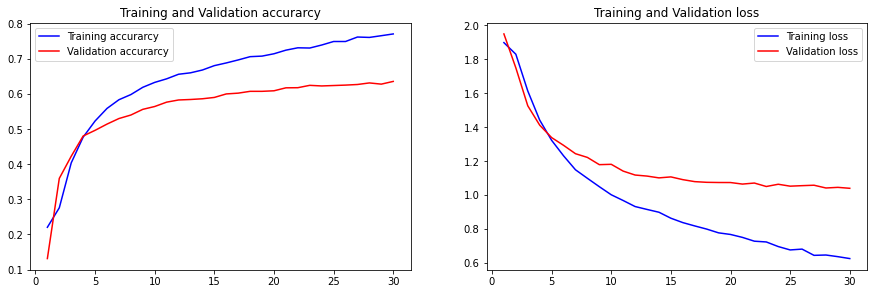

In [69]:
import matplotlib.pyplot as plt
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.subplot(2,2,2)
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

68/68 [==============================] - 0s 5ms/step
Accuracy for class: Angry is 51.839999999999996
Accuracy for class: Disgust is 56.67
Accuracy for class: Fear is 36.61
Accuracy for class: Happy is 87.53999999999999
Accuracy for class: Neutral is 43.32
Accuracy for class: Sad is 77.78
Accuracy for class: Surprise is 68.04


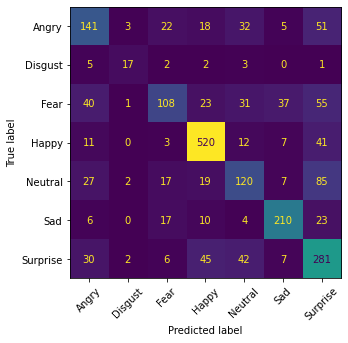

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix, accuracy_score
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor="white")
y_pred =  np.argmax(model_cnn.predict(X_test), axis=1)
# confusion matrix
matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
# accuracy
accuracy_per_class = np.round(matrix.diagonal()/matrix.sum(axis=1), 4)*100
for i, x in enumerate(accuracy_per_class):
  print(f"Accuracy for class: {labels[i]} is {x}")

# plot confusion matrix
ConfusionMatrixDisplay(
confusion_matrix = matrix, 
display_labels = labels).plot(ax=ax, colorbar=False, xticks_rotation=45)

__Commentaires__

Ce modèle peut différentier entre les émotions étant donné une image centrée sur un visage. Il a du mal entre la colère et la surprise, la joie avec la surprise et la neutralité avec la surpise aussi. Des études ont montré que l'émotion de la surpise étaient les plus difficiles à distinguer ainsi que la colère. La joie compte à elle était la plus facile à détecter. On revoit ces résultats sur notre modèle. On ne peut souvent pas comparer notre compréhension à celle d'un CNN, mais dans cette situation, on pourrait conclure que les caractéristiques (features) de cette émotion (surprise) sont ainsi mêlées avec les autres classes.

### Data génération
On essaiera maintenant la data augmentation pour ajouter des observations au dataset et améliorer le pouvoir de généralisation du modèle, on appliquera pas de scaling vu que les données le sont déjà:

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)
val_datagen = ImageDataGenerator()

In [89]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)
val_generator = val_datagen.flow(X_val, y_val, batch_size=128)
history = model_cnn.fit_generator(train_generator,
                                steps_per_epoch=len(X_train) // 128,
                                epochs=20,
                                validation_data=val_generator,
                                validation_steps=len(X_val) // 128)

<ipython-input-89-ee474ae35d2e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_cnn.fit_generator(train_generator,


Epoch 1/20
105/105 [==============================] - 10s 87ms/step - loss: 1.7373 - acc: 0.2989 - val_loss: 1.6290 - val_acc: 0.3502
Epoch 2/20
105/105 [==============================] - 8s 74ms/step - loss: 1.6957 - acc: 0.3191 - val_loss: 1.6210 - val_acc: 0.3622
Epoch 4/20
105/105 [==============================] - 8s 74ms/step - loss: 1.6952 - acc: 0.3174 - val_loss: 1.6101 - val_acc: 0.3613
Epoch 5/20
105/105 [==============================] - 8s 74ms/step - loss: 1.6858 - acc: 0.3266 - val_loss: 1.6240 - val_acc: 0.3573
Epoch 6/20
105/105 [==============================] - 8s 73ms/step - loss: 1.6864 - acc: 0.3243 - val_loss: 1.5894 - val_acc: 0.3757
Epoch 7/20
105/105 [==============================] - 8s 72ms/step - loss: 1.6832 - acc: 0.3251 - val_loss: 1.6280 - val_acc: 0.3644
Epoch 8/20
105/105 [==============================] - 8s 73ms/step - loss: 1.6787 - acc: 0.3328 - val_loss: 1.6076 - val_acc: 0.3795
Epoch 9/20
105/105 [==============================] - 8s 73ms/step -

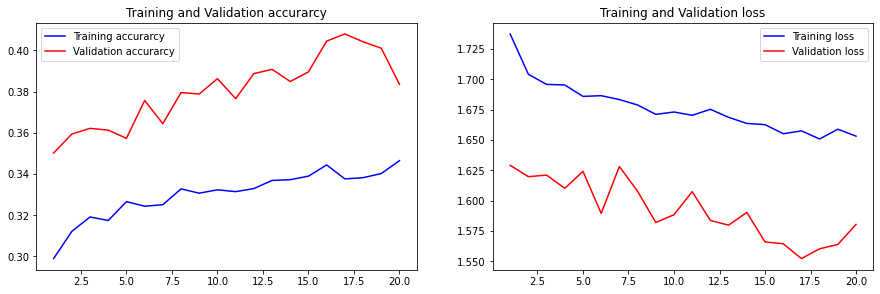

In [90]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.subplot(2,2,2)
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

68/68 [==============================] - 0s 5ms/step


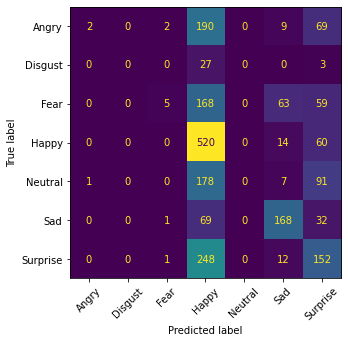

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(1,1, figsize=(5,5), facecolor="white")
y_pred =  np.argmax(model_cnn.predict(X_test), axis=1)
ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred), 
display_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']).plot(ax=ax, colorbar=False, xticks_rotation=45)

Cette expérience n'a pas abouti à de bons résultats, il faudra donc revoir les paramètres de génération de données!

### Encodage avec un modèle vision pré-entraîné: CLIP-ViT

On passe maintenant à un encodage avec un modèle pré-entraîné (Le visual transformer Clip-ViT). L'un des soucis auxquels on pourrait faire face dans ce cas est l'état des images dans le dataset versus les images du dataset d'entraînement du modèle. Il faudra mettre notre dataset dans le bon format. Cependant, la mémoire se sature à chaque essai, donc la solution serait de le faire par batch (ici batch_size = 1), une solution plus propre et élaborée (avec un torch DataLoader) est utilisée dans le miniprojet. Il faut aussi travailler avec des image de [0, 255] car on pourra les stocker en int8 au lieu de float32 ou float64 pour les images normalisées, ce qui prend beaucoup plus de place:

In [4]:
import cv2
X_resized = []
for im in X:
    im2 = cv2.resize(im,(224, 224))
    X_resized.append(im2)
    # X_resized.append(np.vstack((im2, im2, im2)))
# X_train, X_val, y_train, y_val = train_test_split(X_resized, y, test_size=.2, random_state=10, shuffle=True)

In [ ]:
import tensorflow as tf
X_resized = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(X_resized),
    name=None
)

In [2]:
import tensorflow as tf
import clip

In [29]:
from tqdm import tqdm
import torch
from PIL import Image
from matplotlib import cm
from google.colab.patches import cv2_imshow

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load the model
def get_features(dataset):
    all_features = []
    with torch.no_grad():

      for image in dataset:
              # shape (224, 224, 3)
              image = np.concatenate((image, image, image), axis=2)
              image = np.uint8(image*255)
              image = preprocess(Image.fromarray(image*255)).unsqueeze(0).cuda()

              # get encoding
              
              image_features = model.encode_image(image.cuda())

              all_features.append(image_features)
              del image
    return all_features

# Calculate the image features
train_features = get_features(np.array(X))

In [33]:
all_features = torch.cat(train_features).cpu().numpy()
all_features.shape

(19357, 512)

Clip encode les images en vecteurs de 512, ce sera l'entrée de notre classifieur:

In [35]:
from sklearn.model_selection import train_test_split
X_train_clip, X_val_clip, y_train, y_val = train_test_split(all_features, y, test_size=.3, random_state=1, shuffle=True)

In [51]:
from tensorflow.keras import models, layers, optimizers
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='elu', input_dim=512))
model2.add(layers.Dense(32, activation='elu'))
model2.add(layers.Dense(32, activation='elu'))

model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-3), metrics=['acc'])
history = model2.fit(X_train_clip, y_train,
                                batch_size=256,
                                epochs=50,
                                validation_data=[X_val_clip, y_val],
                                )

Epoch 1/50
53/53 [==============================] - 1s 7ms/step - loss: 1.6497 - acc: 0.3671 - val_loss: 1.3650 - val_acc: 0.5096
Epoch 2/50
53/53 [==============================] - 0s 5ms/step - loss: 1.3730 - acc: 0.5039 - val_loss: 1.2682 - val_acc: 0.5300
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 1.2842 - acc: 0.5341 - val_loss: 1.2225 - val_acc: 0.5461
Epoch 4/50
53/53 [==============================] - 0s 5ms/step - loss: 1.2449 - acc: 0.5499 - val_loss: 1.1879 - val_acc: 0.5616
Epoch 5/50
53/53 [==============================] - 0s 5ms/step - loss: 1.2146 - acc: 0.5557 - val_loss: 1.1719 - val_acc: 0.5685
Epoch 6/50
53/53 [==============================] - 0s 5ms/step - loss: 1.2080 - acc: 0.5614 - val_loss: 1.1653 - val_acc: 0.5701
Epoch 7/50
53/53 [==============================] - 0s 5ms/step - loss: 1.1775 - acc: 0.5744 - val_loss: 1.1496 - val_acc: 0.5770
Epoch 8/50
53/53 [==============================] - 0s 5ms/step - loss: 1.1610 - acc: 0.58

Même avec un encodage de Visual Transformer on arrive pas à casser la barrière de 61% en accuracy de validation. Ce modèle cependant est nettement plus légère et rapide dès lors qu'on a encodé les images du dataset avec le modèle. Il serait difficile de le finetune vu que CLIP s'est entraîné sur 40Md d'images et de texte. Il serait peut être intéressant d'encoder les labels (en format de texte) par CLIP et regarder les résultats en termes de similarité au lieu d'ajouter un classifieur!